In [1]:
import cveig
import matplotlib.pyplot as plt
import numpy as np
from scipy import sparse
import pandas as pd
from scipy import stats
import numpy as np
from scipy.stats import binom
import pickle

In [2]:
k = 10
n_tries = 10
expected_degrees = np.arange(25, 61, 5)
total_results = []
for degree in expected_degrees:
    results = np.zeros((3,4))
    for i in range(n_tries):
        
        thetas = ['point', 'exp', 'pareto']
        
        for j, theta in enumerate(thetas):
            file = f'../../masters_r/samples/graph_{theta}_{degree}_{i+1}.table'
            print(file)
            adj_matrix = pd.read_table(file, sep=' ').to_numpy()
                
            adj_matrix = sparse.csr_array(adj_matrix)
            results[j, 0] += np.abs(cveig.eig_cv(adj_matrix, 15, 0.1, folds=1) - k)
            results[j, 1] += np.abs(cveig.eig_cv(adj_matrix, 15, 0.1, folds=5) - k)
            results[j, 2] += np.abs(cveig.eig_cv(adj_matrix, 15, 0.1, folds=10) - k)
            results[j, 3] += np.abs(cveig.eig_cv(adj_matrix, 15, 0.1, folds=15) - k)
            
    results /= n_tries
    total_results.append(results)

../../masters_r/samples/graph_point_25_1.table
../../masters_r/samples/graph_exp_25_1.table
../../masters_r/samples/graph_pareto_25_1.table
../../masters_r/samples/graph_point_25_2.table
../../masters_r/samples/graph_exp_25_2.table
../../masters_r/samples/graph_pareto_25_2.table
../../masters_r/samples/graph_point_25_3.table
../../masters_r/samples/graph_exp_25_3.table
../../masters_r/samples/graph_pareto_25_3.table
../../masters_r/samples/graph_point_25_4.table
../../masters_r/samples/graph_exp_25_4.table
../../masters_r/samples/graph_pareto_25_4.table
../../masters_r/samples/graph_point_25_5.table
../../masters_r/samples/graph_exp_25_5.table
../../masters_r/samples/graph_pareto_25_5.table
../../masters_r/samples/graph_point_25_6.table
../../masters_r/samples/graph_exp_25_6.table
../../masters_r/samples/graph_pareto_25_6.table
../../masters_r/samples/graph_point_25_7.table
../../masters_r/samples/graph_exp_25_7.table
../../masters_r/samples/graph_pareto_25_7.table
../../masters_r/samp

In [3]:
with open('results_folds.pickle', 'wb') as f:
    pickle.dump(total_results, f)

In [4]:
point_1 = [i[0,0] for i in total_results]
point_5 = [i[0,1] for i in total_results]
point_10 = [i[0,2] for i in total_results]
point_15 = [i[0,3] for i in total_results]
exp_1 = [i[1,0] for i in total_results]
exp_5 = [i[1,1] for i in total_results]
exp_10 = [i[1,2] for i in total_results]
exp_15 = [i[0,3] for i in total_results]
pareto_1 = [i[2,0] for i in total_results]
pareto_5 = [i[2,1] for i in total_results]
pareto_10 = [i[2,2] for i in total_results]
pareto_15 = [i[0,3] for i in total_results]

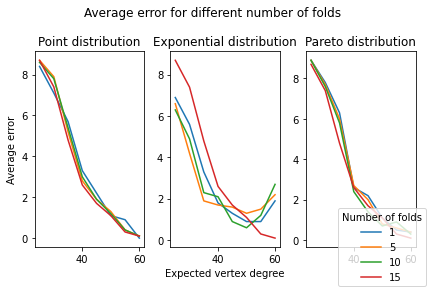

In [5]:
fig, ax = plt.subplots(1,3)
ax[0].plot(expected_degrees, point_1, label='1')
ax[0].plot(expected_degrees, point_5, label='5')
ax[0].plot(expected_degrees, point_10, label='10')
ax[0].plot(expected_degrees, point_15, label='15')
ax[0].set_title('Point distribution')
ax[0].set_ylabel('Average error')

ax[1].plot(expected_degrees, exp_1, label='1')
ax[1].plot(expected_degrees, exp_5, label='5')
ax[1].plot(expected_degrees, exp_10, label='10')
ax[1].plot(expected_degrees, exp_15, label='15')
ax[1].set_title('Exponential distribution')

ax[2].plot(expected_degrees, pareto_1, label='1')
ax[2].plot(expected_degrees, pareto_5, label='5')
ax[2].plot(expected_degrees, pareto_10, label='10')
ax[2].plot(expected_degrees, pareto_15, label='15')
ax[2].set_title('Pareto distribution')
ax[1].set_xlabel('Expected vertex degree')
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right', title='Number of folds')
fig.suptitle('Average error for different number of folds')
fig.tight_layout()
fig.savefig('test_folds.png')